<a href="https://colab.research.google.com/github/MrProper5050/houses-price-prediction/blob/main/House's_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai fastbook --upgrade

In [2]:
from fastai.tabular.all import *
from fastbook import *
import pandas as pd


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/house price/train.csv')
df = df.drop('Id',1)
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [4]:
dep_var = 'SalePrice'

In [5]:
procs = [Categorify, FillMissing]
cont, cat = cont_cat_split(df,1,dep_var=dep_var) # split on continious and categorical variables

In [6]:
to = TabularPandas( df, procs, cat, cont, dep_var, splits=RandomSplitter(seed=1337)(range_of(df)) )

In [7]:
len(to.train),len(to.valid)

(1168, 292)

In [8]:
to.items.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
296,50,5,75.0,13710,2,0,4,4,1,5,1,10,3,3,1,1,5,5,1950,1950,2,2,14,15,3,0.0,4,5,2,4,4,4,2,420,6,0,490,910,2,5,2,1,910,648,0,1558,0,0,1,1,4,1,4,6,7,0,0,2,1950.0,3,1,282,5,5,3,289,0,0,0,0,0,0,3,0,0,6,2007,9,5,152000,1,1,1
453,60,2,75.0,9000,2,0,4,4,1,5,1,22,3,3,1,6,8,5,2008,2008,2,2,13,14,3,0.0,3,5,3,3,4,4,6,0,6,0,768,768,2,1,2,5,786,804,0,1590,0,0,2,1,3,1,3,6,7,0,0,2,2008.0,2,2,676,5,5,3,0,30,0,0,0,0,0,0,0,0,6,2009,9,5,210000,1,1,1
992,60,4,80.0,9760,2,0,4,4,1,5,2,13,3,3,1,6,6,8,1964,1993,4,2,14,15,2,340.0,4,5,2,4,4,2,2,536,5,117,169,822,2,3,2,5,1020,831,0,1851,0,0,2,1,3,1,3,7,7,1,2,2,1964.0,2,2,440,5,5,3,239,42,0,0,0,0,0,4,0,0,7,2007,9,5,187000,1,1,1


In [9]:
#save tabular object to use it in future
path = Path()
save_pickle(path/'to.pkl',to)

In [10]:
#restore tabular object
to = load_pickle(path/'to.pkl')

In [9]:
xs,y = to.train.xs,to.train.y
v_xs,v_y = to.valid.xs,to.valid.y

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
#loss RMSE function
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
#loss RMSLE function
def r_msle(pred,y): return round(math.sqrt(((np.log(pred)-np.log(y))**2).mean()), 6)
def m_rmsle(m, xs, y): return r_msle(m.predict(xs), y)

**Technical note:**

> On this dataset, we use RMSLE because the usual RMSE is highly susceptible to data outliers and its estimate skyrockets. Turning into a logarithmic function saves us from the problem of outliers.





In [12]:
#auxiliary func for creating and fitting RF
def rf(xs,y,n_estimators=40,max_samples=100, max_features=.4, min_samples_leaf=5, **kwargs):
  return RandomForestRegressor(n_estimators=n_estimators, max_samples=max_samples,max_features=max_features, min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs,y)

In [13]:
model = rf(xs,y)

In [14]:
#we are looking at the RMSLE error rating on the training and validation sets
m_rmsle(model, xs, y), m_rmsle(model, v_xs, v_y)

(0.174005, 0.183826)

In [15]:
r_msle(model.oob_prediction_, y)

0.181417

In [16]:
preds = np.stack([t.predict(v_xs) for t in model.estimators_])#get predictions from each decision tree for each house's sale
preds.shape

(40, 292)

**Technical note:**

> Variance of trees for the reliability of predictions - simply, instead of the `mean` function, use `std` to combine predictions of all trees.

In [17]:
preds_std = preds.std(1)

(preds_std[:5])/preds.mean() 

array([0.36998984, 0.3646956 , 0.47222193, 0.3294716 , 0.37296901])

These values are called the reliability of predictions. The lower the better. The standard deviation is an indicator of the variance of the data.

In our particular case: if the standard deviation is high, it means that the predictions of the trees on a specific example (x, sample) of the data are too different from each other and we cannot trust the prediction obtained, it is better to check manually. Otherwise, if std is low, then we can trust the prediction.

In [18]:
preds.mean(0)[:5] # actual predictions

array([208528.9540377 , 208192.40821429, 104912.31388889, 275423.40473214, 134707.00337302])

In [19]:
#what is the most important variables in decision trees
def rf_feature_importance(m,df):
  return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)
imp = rf_feature_importance(model,xs)
imp[:5]


,cols,imp
49,OverallQual,0.219279
61,GrLivArea,0.133273
71,GarageCars,0.108784
58,1stFlrSF,0.074688
72,GarageArea,0.062598


In [20]:
# create new dataset without unnecessary variables
to_keep = imp[imp.imp>0.01].cols
imp_xs = xs[to_keep]
imp_v_xs = v_xs[to_keep]
to_keep

49     OverallQual
61       GrLivArea
71      GarageCars
58        1stFlrSF
72      GarageArea
51       YearBuilt
18       ExterQual
57     TotalBsmtSF
53      MasVnrArea
21        BsmtQual
52    YearRemodAdd
30     KitchenQual
73      WoodDeckSF
54      BsmtFinSF1
64        FullBath
48         LotArea
59        2ndFlrSF
32     FireplaceQu
Name: cols, dtype: object

In [21]:
model = rf(imp_xs,y)

In [22]:
m_rmsle(model, imp_xs, y),m_rmsle(model,imp_v_xs,v_y)

(0.173762, 0.185519)

As we see above, our predictions have not changed much. This is cool because we have simplified our model with almost no loss of accuracy.

## Removing redundant vars

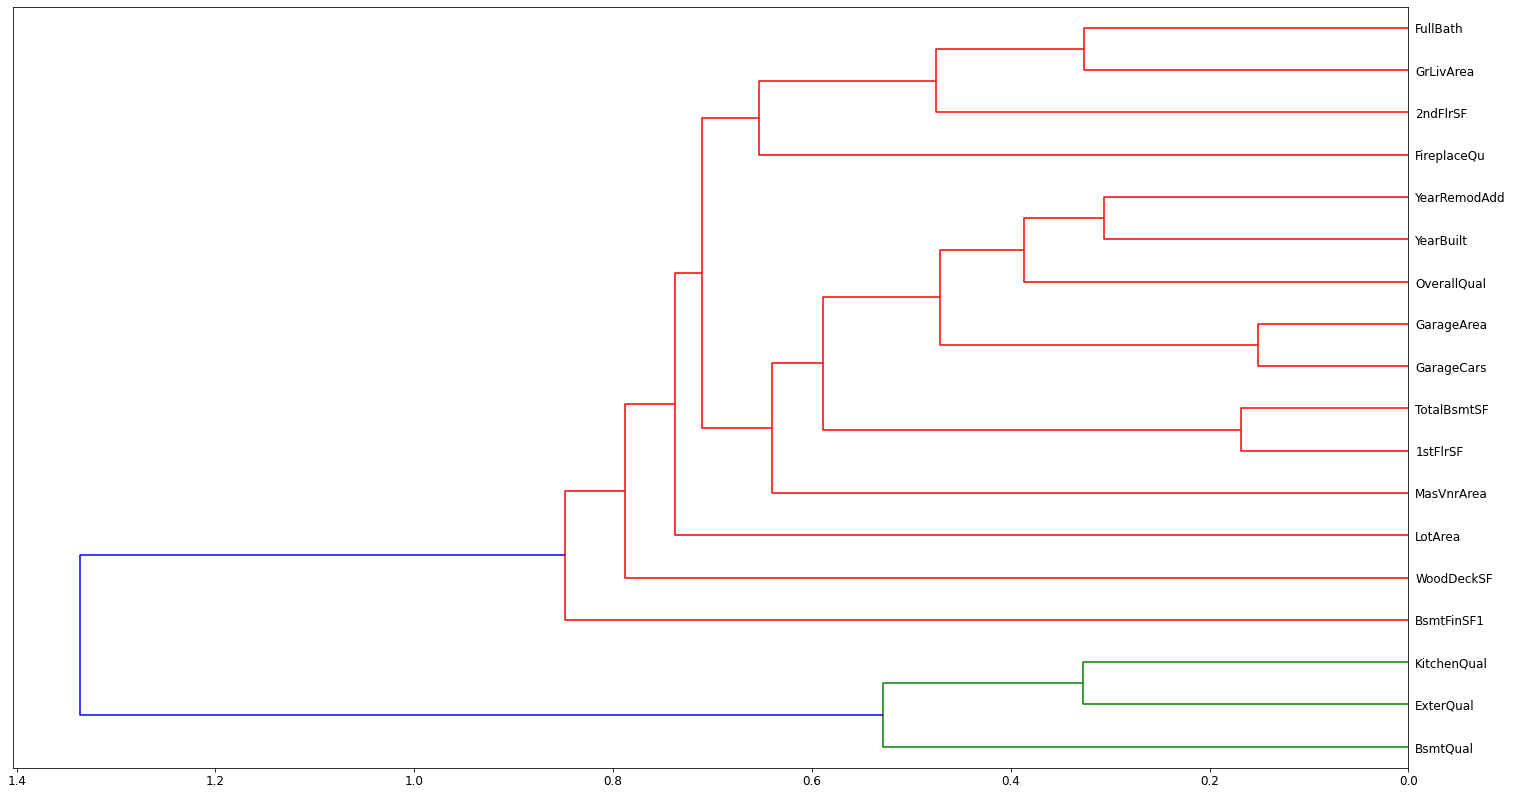

In [23]:
cluster_columns(imp_xs, (25,14)) 

In [24]:
def get_oob(df):
    m = rf(df,y)
    return m.oob_score_

print('orig:', model.oob_score_)
{
    c:get_oob( imp_xs.drop(c,axis=1) ) for c in ('GarageArea','GarageCars','YearRemodAdd','YearBuilt','TotalBsmtSF','1stFlrSF', 'ExterQual','KitchenQual', 'GrLivArea','FullBath')
}


orig: 0.7774087314662272


{'1stFlrSF': 0.7757628942342303,
 'ExterQual': 0.7715559405660961,
 'FullBath': 0.7744628495340661,
 'GarageArea': 0.7710336740892265,
 'GarageCars': 0.7766904194280507,
 'GrLivArea': 0.7428921594691329,
 'KitchenQual': 0.7736554478453832,
 'TotalBsmtSF': 0.7767145136062541,
 'YearBuilt': 0.7781738596264636,
 'YearRemodAdd': 0.7646536049992192}

As we can see above, then we are removing `FullBath` and `GarageArea`, OOB score go up. That's well.
Let's drop these columns and try our model.





In [27]:
#dropping redundant vars
fin_xs = imp_xs.drop(['FullBath', 'GarageArea'], 1)
fin_v_xs = imp_v_xs.drop(['ExterQual', 'GarageArea'], 1)

In [28]:
model = rf(fin_xs,y)
model.oob_score_

0.7788590329500767

It has hardly changed in comparison with the last test. This is good, because we have simplified the model without colossal performance losses

## Solving extrapolation problem


Extrapolation problem is when ML algorithm can't extrapolate future data. i.e it can't work on out-of-domain data.

To find out if we have such a problem, we will create another RandomForest, which will determine from which data set the specific row is from. Then, we will get features importances...

In [94]:
#new dataset
ds_super = pd.concat([fin_xs, fin_v_xs])
is_valid = np.array([0]*len(fin_xs) + [1]*len(fin_v_xs))

In [95]:
m = rf(ds_super,is_valid)
rf_feature_importance(m, ds_super)[:5]

,cols,imp
1,GrLivArea,0.123701
6,LotArea,0.123178
4,1stFlrSF,0.116718
8,GarageYrBlt,0.100891
5,BsmtFinSF1,0.095307


I don't see any point in deleting GrLivArea because it is an important factor in prediction, as we have seen before. And besides, the area of the plot is unlikely to change over time.
But we will still try to remove all the columns from this list, in case something comes out of it.

In [ ]:
print('original:', m_rmsle(model,fin_v_xs,v_y) )

for col in ('MoSold','GrLivArea','TotalBsmtSF','LotArea','1stFlrSF'):
  m = rf(fin_xs.drop(col,1), y)
  print(col, m_rmsle(m, fin_v_xs.drop(col,1),v_y) )

original: 0.166801
MoSold 0.172804
GrLivArea 0.170345
TotalBsmtSF 0.170975
LotArea 0.17039
1stFlrSF 0.167873


Yeah, as I suggested. We did not get a large increase in the accuracy of the model. In the first 4 columns, we got an even worse result.


In [ ]:
fin_xs = fin_xs.drop('1stFlrSF',1)
fin_v_xs = fin_v_xs.drop('1stFlrSF',1)

In [ ]:

model = rf(fin_xs,y)
m_rmsle(model, fin_v_xs,v_y)

0.170029

We will not check the RMSLE, since we did it above. 
This way we have simplified the model even more.

## Kaggle test

In [113]:
test_df = pd.read_csv('/content/drive/MyDrive/Datasets/house price/test.csv')
test_df = test_df[list(fin_xs.columns)]
cont, cat = cont_cat_split(test_df)
cont

['GrLivArea',
 'GarageCars',
 'YearBuilt',
 '1stFlrSF',
 'BsmtFinSF1',
 'LotArea',
 'GarageYrBlt',
 '2ndFlrSF',
 'OpenPorchSF',
 'YearRemodAdd',
 'WoodDeckSF']

In [118]:
test_to = TabularPandas(test_df, procs,cat,cont)
X = test_to.train.xs.drop(['GarageYrBlt_na','BsmtFinSF1_na','GarageCars_na'],1)

In [107]:
test_ds = X.dataloaders(65)

In [120]:
preds = model.predict(X)

In [123]:
preds_fn = {'SalePrice':preds}
test_df_end = pd.DataFrame(data=preds_fn, index=pd.Index(range(1461,2920)))
test_df_end

,SalePrice
1461,130001.617679
1462,147506.985635
1463,165721.829355
1464,169857.936498
1465,190045.265179
...,...
2915,132222.288829
2916,134019.178710
2917,143073.486825
2918,136547.914504


In [124]:
with open('/content/drive/MyDrive/Datasets/house price/submit_rf.csv','w') as f:
  test_df_end.to_csv(f, index=True, index_label='Id')

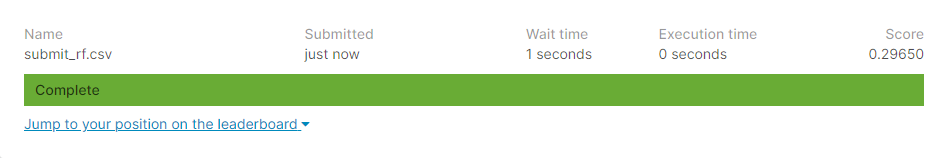

Score on the kaggle competition is 0.29. Not bad :^)

# Neural Network implementation

Do the same preprocessing of data as before.

In [62]:
df_nn = pd.read_csv('/content/drive/MyDrive/Datasets/house price/train.csv')
df_nn[dep_var] = df_nn[dep_var]*1.0 # cast to float
procs = [Categorify, FillMissing(add_col=False)] # disable adding columns, so that there are no errors
fin_df_nn = df_nn[list(fin_xs.columns) + [dep_var]] # using the same variables as in RF model
cont_nn, cat_nn = cont_cat_split(fin_df_nn,1,dep_var=dep_var)
print(fin_df_nn.columns.shape) # number of columns

(17,)


In [63]:
fin_df_nn[cat_nn].nunique() # number of unique values in each cat_nn column

ExterQual      4
BsmtQual       4
KitchenQual    4
FireplaceQu    5
dtype: int64

In [64]:
to_nn = TabularPandas(fin_df_nn, procs, cat_nn, cont_nn, dep_var, splits=RandomSplitter(seed=777)(range_of(fin_df_nn)),)
dls = to_nn.dataloaders(64)
dls.train.xs.columns


Index(['ExterQual', 'BsmtQual', 'KitchenQual', 'FireplaceQu', 'OverallQual',
       'GrLivArea', 'GarageCars', '1stFlrSF', 'YearBuilt', 'TotalBsmtSF',
       'MasVnrArea', 'YearRemodAdd', 'WoodDeckSF', 'BsmtFinSF1', 'LotArea',
       '2ndFlrSF'],
      dtype='object')

The best practice is define range of the dependent variable when using a regression model. Let's do this!

In [59]:
to_nn.y.min(), to_nn.y.max()

(34900.0, 755000.0)

In [65]:
learn = tabular_learner(dls, y_range=[34900.0, 755000.0], n_out=1, loss_func=F.mse_loss)

SuggestedLRs(valley=0.009120108559727669)

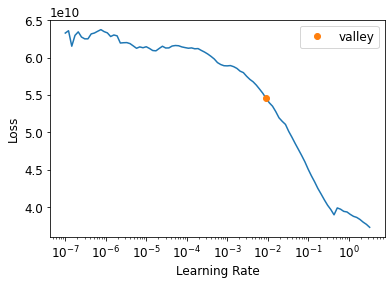

In [66]:
learn.lr_find()

In [67]:
learn.fit_one_cycle(100,0.009)

epoch,train_loss,valid_loss,time
0,53760991232.000000,314214350848.000000,00:00
1,48795107328.000000,81721417728.000000,00:00
2,44105093120.000000,37008752640.000000,00:00
3,40341172224.000000,26765922304.000000,00:00
4,35790983168.000000,20893730816.000000,00:00
5,30883917824.000000,17797263360.000000,00:00
6,26550464512.000000,12908413952.000000,00:00
7,22328313856.000000,10070633472.000000,00:00
8,17601298432.000000,11842681856.000000,00:00
9,13150548992.000000,3137933568.000000,00:00


In [68]:
preds, targs = learn.get_preds()
print(preds[:5],targs[:5]) # comparing predictions by eye
r_msle(preds,targs) # DNN model accuracy on the some dataset



tensor([[178488.4688],
        [376258.1250],
        [222946.9219],
        [219536.7812],
        [228541.0469]]) tensor([[176000.],
        [345000.],
        [207000.],
        [230000.],
        [265979.]])


0.163519

Let's save model...

In [94]:
learn.save(Path('/content/drive/MyDrive/Datasets/house price')/'dnn18per.pkl')

Path('/content/drive/MyDrive/Datasets/house price/dnn18per.pkl.pth')

## DNN test

In [69]:
test_df = pd.read_csv('/content/drive/MyDrive/Datasets/house price/test.csv')
test_df = test_df[list(fin_df_nn.columns.drop('SalePrice'))]
cont_nn, cat_nn = cont_cat_split(test_df,1,dep_var=dep_var)
procs = [Categorify, FillMissing(add_col=False)]

In [70]:
test_to = TabularPandas(test_df, procs,cat_nn,cont_nn)
ds = test_to.dataloaders(64)

In [ ]:
preds = []
for idx, row in ds.train.xs.iterrows():
  preds.append( (learn.predict(row)[1])[0].item())

In [95]:
preds[:5]

[119175.9609375, 189337.765625, 235130.90625, 231405.1875, 202541.53125]

In [88]:
#prepair submition dataframe
preds_fn = {'SalePrice':preds}
test_df = pd.DataFrame(data=preds_fn, index=pd.Index(range(1461,2920)))

In [89]:
test_df

,SalePrice
1461,119175.960938
1462,189337.765625
1463,235130.906250
1464,231405.187500
1465,202541.531250
...,...
2915,81802.250000
2916,91941.343750
2917,188843.421875
2918,116527.171875


In [90]:
#submit my solution
with open('/content/drive/MyDrive/Datasets/house price/submit_DNN.csv','w') as f:

  test_df.to_csv(f,index=True, index_label='Id')

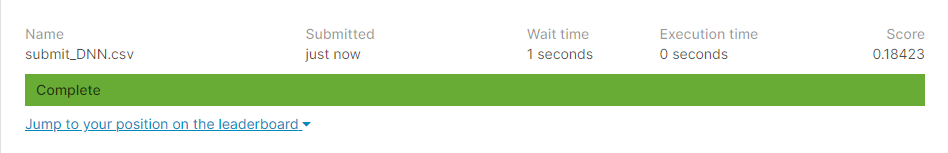

Our DNN model predicts with 18% of accuracy. That's very well. Random forest model, as we remember, predicts with 29% of accuracy...

**Thank you for your reading!**